In [1]:
import pandas as pd
import os
i=0

In [2]:
'''for filename in os.listdir('E:\\MyCodes\\KeithG\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data'):
    with open(os.path.join('E:\\MyCodes\\KeithG\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data',filename),'r') as f:
        with open('E:\\MyCodes\\all_data_mine.csv','a') as file:
            if i!=0:
                next(f)
            file.write(f.read())
            i+=1'''

"for filename in os.listdir('E:\\MyCodes\\KeithG\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data'):\n    with open(os.path.join('E:\\MyCodes\\KeithG\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data',filename),'r') as f:\n        with open('E:\\MyCodes\\all_data_mine.csv','a') as file:\n            if i!=0:\n                next(f)\n            file.write(f.read())\n            i+=1"

In [3]:
all_data=pd.read_csv('E:\\MyCodes\\all_data_mine.csv')

#all_data.head()

In [4]:
all_data.dropna(subset = ["Order Date"], inplace=True)
#all_data.head()

In [5]:
all_data["Month"]=all_data["Order Date"].str[0:2]
#all_data.head()

In [6]:
for indices in all_data[all_data["Month"]=='Or'].index.values:
    all_data=all_data.drop(index=indices)
all_data["Month"]=all_data["Month"].astype('int32')

In [7]:
all_data["Price Each"]=all_data["Price Each"].astype('float32')
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype('int32')
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
#all_data.head()

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [9]:
results=all_data.groupby("Month").sum()

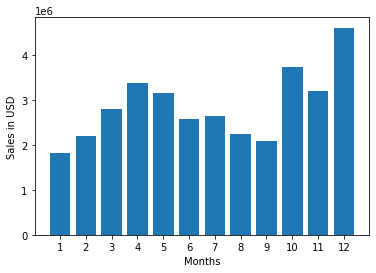

In [10]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Months")
plt.show()

In [11]:
addresses=all_data["Purchase Address"]
cities=[]
for address in addresses:
    address=address.split(",")
    state=address[2].split(" ")
    cities.append(address[1]+","+state[1])
    
all_data["City"]=cities
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,"Boston,MA"
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,"Los Angeles,CA"


In [12]:
results=all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2779908.250,104794,2.795499e+06
"Austin,TX",11153,1809873.625,69829,1.819582e+06
"Boston,MA",22528,3637409.750,141112,3.661642e+06
"Dallas,TX",16730,2752627.750,104620,2.767975e+06
"Los Angeles,CA",33289,5421435.000,208325,5.452571e+06
"New York City,NY",27932,4635371.000,175741,4.664317e+06
"Portland,ME",2750,447189.250,17144,4.497583e+05
"Portland,OR",11303,1860558.250,70621,1.870732e+06
"San Francisco,CA",50239,8211461.500,315520,8.262204e+06


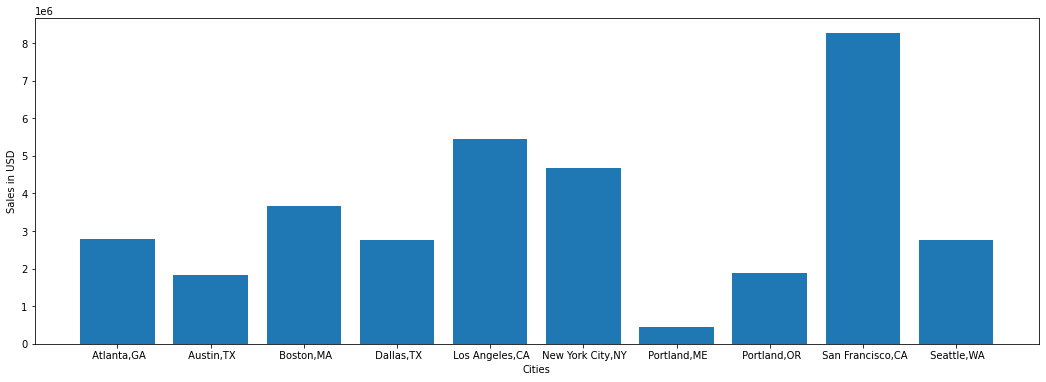

In [13]:
plt.figure(figsize=(18,6))
plt.bar(results.index.values,results['Sales'])
plt.xticks(results.index.values)
plt.ylabel("Sales in USD")
plt.xlabel("Cities")
plt.show()


In [14]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [15]:
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data["Hour"]=all_data["Order Date"].dt.hour



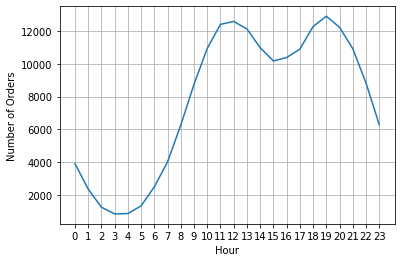

In [16]:
results=all_data.groupby("Hour").count()
plt.plot(results.index.values,results['Sales'])
plt.xticks(results.index.values)
plt.ylabel("Number of Orders")
plt.xlabel("Hour")
plt.grid()
plt.show()


In [17]:
results=all_data.groupby('Order ID')['Product'].apply(lambda x: "{%s}" % ', '.join(x))

In [18]:
results

Order ID
141234                        {iPhone}
141235      {Lightning Charging Cable}
141236              {Wired Headphones}
141237              {27in FHD Monitor}
141238              {Wired Headphones}
                      ...             
319666      {Lightning Charging Cable}
319667         {AA Batteries (4-pack)}
319668               {Vareebadd Phone}
319669              {Wired Headphones}
319670    {Bose SoundSport Headphones}
Name: Product, Length: 178437, dtype: object

In [19]:
items=[]
for products in results:
    if products.count(",")>0:
        items.append(products)
items


['{USB-C Charging Cable, Wired Headphones}',
 '{Apple Airpods Headphones, AA Batteries (4-pack)}',
 '{Vareebadd Phone, Wired Headphones}',
 '{Google Phone, USB-C Charging Cable}',
 '{Google Phone, Bose SoundSport Headphones}',
 '{iPhone, Apple Airpods Headphones}',
 '{Google Phone, Apple Airpods Headphones}',
 '{iPhone, Apple Airpods Headphones, Wired Headphones}',
 '{USB-C Charging Cable, Apple Airpods Headphones}',
 '{Lightning Charging Cable, Wired Headphones}',
 '{iPhone, Lightning Charging Cable}',
 '{27in FHD Monitor, Bose SoundSport Headphones}',
 '{Google Phone, USB-C Charging Cable}',
 '{iPhone, Wired Headphones}',
 '{Google Phone, USB-C Charging Cable}',
 '{AA Batteries (4-pack), AAA Batteries (4-pack)}',
 '{Vareebadd Phone, USB-C Charging Cable, Wired Headphones}',
 '{Google Phone, USB-C Charging Cable}',
 '{Vareebadd Phone, Wired Headphones}',
 '{34in Ultrawide Monitor, Lightning Charging Cable}',
 '{USB-C Charging Cable, Wired Headphones}',
 '{Lightning Charging Cable, Bos

In [20]:
from collections import Counter 
item_dict=dict(Counter(items))
sort_item = sorted(item_dict.items(), key=lambda x: x[1], reverse=True)
#sort_item = sorted(item_dict, key=lambda x: x[1], reverse=True)

for i in sort_item:
    print(i)




('{iPhone, Lightning Charging Cable}', 882)
('{Google Phone, USB-C Charging Cable}', 856)
('{iPhone, Wired Headphones}', 361)
('{Vareebadd Phone, USB-C Charging Cable}', 312)
('{Google Phone, Wired Headphones}', 303)
('{iPhone, Apple Airpods Headphones}', 286)
('{Google Phone, Bose SoundSport Headphones}', 161)
('{Vareebadd Phone, Wired Headphones}', 104)
('{Google Phone, USB-C Charging Cable, Wired Headphones}', 77)
('{Vareebadd Phone, Bose SoundSport Headphones}', 60)
('{iPhone, Lightning Charging Cable, Wired Headphones}', 56)
('{Lightning Charging Cable, USB-C Charging Cable}', 55)
('{Lightning Charging Cable, AA Batteries (4-pack)}', 52)
('{AA Batteries (4-pack), Lightning Charging Cable}', 51)
('{Lightning Charging Cable, Lightning Charging Cable}', 51)
('{AAA Batteries (4-pack), USB-C Charging Cable}', 50)
('{AA Batteries (4-pack), AAA Batteries (4-pack)}', 48)
('{AAA Batteries (4-pack), AAA Batteries (4-pack)}', 48)
('{USB-C Charging Cable, USB-C Charging Cable}', 46)
('{Apple 

In [34]:
results=all_data.groupby("Product").sum()
results

,Quantity Ordered,Price Each,Month,Sales,Minute,Hour
Product,,,,,,
20in Monitor,4129,4.510690e+05,29336,4.541487e+05,122252,58764
27in 4K Gaming Monitor,6244,2.429638e+06,44440,2.435097e+06,184331,90916
27in FHD Monitor,7550,1.125975e+06,52558,1.132425e+06,219948,107540
34in Ultrawide Monitor,6199,2.348718e+06,43304,2.355558e+06,183480,89076
AA Batteries (4-pack),27635,7.901568e+04,145558,1.061184e+05,609039,298342
AAA Batteries (4-pack),31017,6.171659e+04,146370,9.274083e+04,612113,297332
Apple Airpods Headphones,15661,2.332350e+06,109477,2.349150e+06,455570,223304
Bose SoundSport Headphones,13457,1.332367e+06,94113,1.345565e+06,392603,192445
Flatscreen TV,4819,1.440000e+06,34224,1.445700e+06,142789,68815


<ipython-input-62-e6596760adea>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(results.index.values,rotation="vertical")


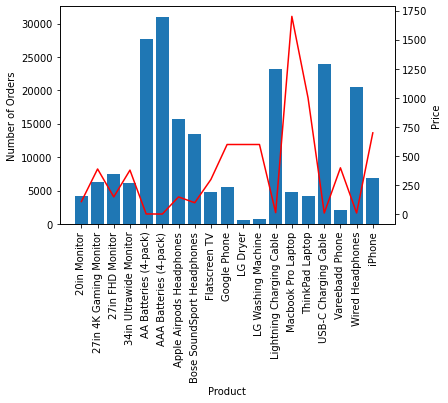

In [62]:
quantity=results['Quantity Ordered']
price=results['Sales']/results['Quantity Ordered']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(results.index.values,quantity)
ax2.plot(results.index.values,price,color='red')
ax1.set_xticklabels(results.index.values,rotation="vertical")
ax1.set_ylabel("Number of Orders")
ax2.set_ylabel("Price")
ax1.set_xlabel("Product")
plt.show()